## $$PROJECT$$
# $$Face Emotion Recognition$$
## $$Sonia Mehra, Souvik Paul$$
## $$31 AUG \ 2020$$

## ABSTRACT
In this Project we have used Convolutional Neural Network to recognise emotion of a face from its image. We have classified the emotions as ‘*Angry*’, '*Disgust*', '*Fear*', '*Happy*', '*Sad*', '*Surprise*' and  '*Neutral*'. ‘**FER2013**’ data, consists of 35887 observations/images with emotion labels, is used. Firstly, the data is divided into training set, validation set and test set with ratio *8:1:1*. Then from the training set we found out the number of observations corresponding to each label. Next, we trained the training data on different models and based on accuracy from the Validation set , we have chosen the best model and found its test accuracy. Lastly, we test our model with some real examples.Here, we have only provided the best of all the models which we have tried.

## INTRODUCTION
In the era of **Artificial Intelligence** many unbelievable things become possible. Using a machine we can find out the person in front of you are telling lie or truth, just seeing a image of person **Facebook** can detect its name and details, hearing our voice **Google** understands and shows us the relevant websites etc. **CNN** in *Deep Learning* is such a tool to achieve perfection in image recognition. Significant additional impacts in image or object recognition were felt from 2011 to 2012. Although *CNN*s trained by backpropagation had been around for decades, and GPU implementations of NNs for years, including CNNs, fast implementations of *CNN*s with *max-pooling* on GPUs in the style of *Ciresan* and colleagues were needed to progress on computer vision. In 2011, this approach achieved for the first time superhuman performance in a visual pattern recognition contest. Also in 2011, it won the **ICDAR** Chinese handwriting contest, and in May 2012, it won the **ISBI** image segmentation contest.  Until 2011, CNNs did not play a major role at computer vision conferences, but in June 2012, a paper by *Ciresan et al.* at the leading conference **CVPR** showed how *max-pooling* *CNN*s on GPU can dramatically improve many vision benchmark records. In November 2012, *Ciresan* et al.'s system also won the **ICPR** contest on analysis of large medical images for **cancer** detection. 

Here we also used CNN to recognise face emotion by seeing a picture of a person.



## OBJECTIVE
Objective of the project is to develop a face emotion recogniser based on 36K samples.


## DATA INFORMATION
This ‘**FER2013**’ data is collected from <a href="https://www.kaggle.com/ahmedmoorsy/facial-expression/" target="_blank">Kaggle</a>. There are 35887 examples in the data and each example is **48 x 48 x 1** grayscale image. Data is divided into 80%, 10% and 10% respectively for train set, dev set and test set. Thus we get 28709 examples in the train set and  3589 examples in both the dev set and test set. This data was firstly used in <a href="https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data/" target="_blank">Kaggle Challenge</a> and the winner got 71.161% test-accuracy. The data consists of 3 columns and 35888 rows (with first row as heading). First column is for *label* , second column is for *pixels* (but all pixels are in a single excel cell separated by space for a single observation) and third column is for name of the *emotion* corresponding to *label*. In our training set there are 441 ‘*disgust*’ images (lowest) and 7152 ‘*angry*’ images. Let’s do the analysis.

## ANALYSIS
In the whole analysis various models are used. These models vary by **hyperparameters** such as *number of convnet layers*, *number of fully connected layers*, *number of filters*, *size of filter*, *padding*, *strides*, *activation function*. As there are seven categories , ‘*softmax*’ activation is in the final layer instead of ‘*sigmoid*’ (which is used for binary category). *Keras* is used in the analysis with *Tensorflow* at the backend.


#### Necessary modules to Import

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import sys
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 The function below is to import data in such a way that the *pixel* values for each observation can be elements of an array.

In [2]:
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X,Y=getData('/content/drive/My Drive/dataset_face/fer2013.csv')


Let's check the data.

In [5]:
print(X)
print("Type of X is:\n",type(X))
print(Y)
print("Type of Y is:\n",type(Y))

[[0.2745098  0.31372549 0.32156863 ... 0.41568627 0.42745098 0.32156863]
 [0.59215686 0.58823529 0.57647059 ... 0.75686275 0.71764706 0.72156863]
 [0.90588235 0.83137255 0.61176471 ... 0.34509804 0.43137255 0.59607843]
 ...
 [0.06666667 0.06666667 0.0627451  ... 0.60392157 0.52156863 0.44313725]
 [0.11764706 0.10980392 0.10980392 ... 0.1372549  0.11764706 0.10980392]
 [0.0745098  0.05098039 0.05490196 ... 0.74117647 0.78039216 0.78823529]]
Type of X is:
 <class 'numpy.ndarray'>
[0 0 2 ... 0 3 2]
Type of Y is:
 <class 'numpy.ndarray'>


In [6]:
X=X.reshape(35887,48,48,1)
print("Shape of X is:",X.shape)
print("Shape of Y is:",Y.shape)


Shape of X is: (35887, 48, 48, 1)
Shape of Y is: (35887,)


Here shape of **X** is $(m,n_H,n_W,1)$ = (35887, 48, 48, 1) where m is the number of examples, $n_H$ is number pixels in height, $n_W$ is number of pixels in width of an image and 1 due to single layer grayimage. Label **Y** is a vector of 35887 elements.

In [7]:
random.seed(13)

In [8]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, Y, test_size=0.2,random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5,random_state=0,shuffle=False)

In [9]:
print("Size of X_train:",X_train.shape[0])
print("Size of X_val:",X_val.shape[0])
print("Size of X_test:",X_test.shape[0])

Size of X_train: 28709
Size of X_val: 3589
Size of X_test: 3589


Frequency distribution of each *emotion* in training set.

In [10]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
A,B=np.unique(y_train,return_counts=True)
emotion_counts=pd.DataFrame({'emotion':A,'number':B})
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
print(emotion_counts)


    emotion  number
0     Angry    3992
1    Digust     441
2      Fear    4115
3     Happy    7152
4       Sad    4816
5  Surprise    3203
6   Neutral    4990


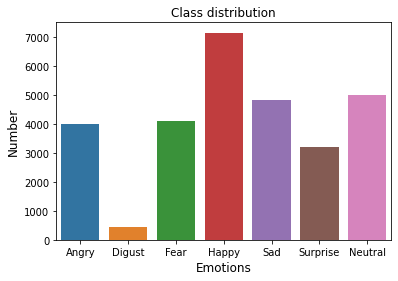

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

Importing necessary modules for *Keras*.

In [12]:
from keras.models import Sequential, Model
from keras.layers import Dense , Activation , Dropout ,Flatten, ZeroPadding2D,  Input
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image
import pydot

## Model 1

In [13]:
def mymodel1():
    input_shape=(48,48,1)
    X_input=Input(input_shape)

    X=Conv2D(64,(5,5),activation='relu',name='conv0',padding='same')(X_input)
    X=Conv2D(64,(5,5),activation='relu',name='conv1',padding='same')(X)
    X=BatchNormalization()(X)
    X=MaxPooling2D(pool_size=(2, 2),name='maxpool0')(X)

    X=Conv2D(128, (5, 5),activation='relu',padding='same',name='conv2')(X)
    X=Conv2D(128, (5, 5),activation='relu',padding='same',name='conv3')(X)
    X=BatchNormalization()(X)
    X=MaxPooling2D(pool_size=(2, 2),name='maxpool1')(X)

    X=Conv2D(256, (3, 3),activation='relu',padding='same',name='conv4')(X)
    X=Conv2D(256, (3, 3),activation='relu',padding='same',name='conv5')(X)
    X=BatchNormalization()(X)
    X=MaxPooling2D(pool_size=(2, 2),name='maxpool2')(X)

    X=Flatten()(X)
    X=Dense(128)(X)
    X=BatchNormalization()(X)
    X=Activation('relu')(X)
    X=Dropout(0.2)(X)
    X=Dense(7)(X)
    X=Activation('softmax')(X)
    
    model=Model(inputs=X_input, outputs=X, name='mymodel1')
    
    return model

**Note** - 

(i) First, second arguement in Conv2D is number of filters and filter size. *padding='same'* is used to keep $n_H$ and $n_W$ same after convolution

(ii) In the arguement in *Avtivation* , function *relu* is used.

(iii) Arguement in *MaxPooling2D* , *AveragePooling2D* is pool size

(iv) *Flatten* converts the Convnet into simple nn layer and *Dense(7)* fully connects this simple layer with another simple nn layer with 7 neurons 

(v) *Batchnormalization* is technique to normalize the input layer by re-centering  and re-scaling

(vi) *Dropout* is a regularization technique. *Dropout(p)* randomly removes px100% neurons in a layer.

In [14]:
face_model1=mymodel1()
face_model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
y1=y_train
y_train=(np.arange(7)==y_train[:,None]).astype(np.float32)


In [15]:
y2=y_val
y_val=(np.arange(7)==y_val[:,None]).astype(np.float32)

In [16]:
history1=face_model1.fit(x=X_train, y=y_train, epochs=20, batch_size=64,verbose=1, validation_data=(X_val,y_val) )

Epoch 1/20
449/449 [==============================] - 24s 54ms/step - loss: 1.6864 - accuracy: 0.3412 - val_loss: 1.7379 - val_accuracy: 0.2856
Epoch 2/20
449/449 [==============================] - 24s 52ms/step - loss: 1.3548 - accuracy: 0.4800 - val_loss: 1.2953 - val_accuracy: 0.5135
Epoch 3/20
449/449 [==============================] - 24s 52ms/step - loss: 1.1640 - accuracy: 0.5606 - val_loss: 1.3322 - val_accuracy: 0.5004
Epoch 4/20
449/449 [==============================] - 24s 53ms/step - loss: 1.0378 - accuracy: 0.6113 - val_loss: 1.1467 - val_accuracy: 0.5665
Epoch 5/20
449/449 [==============================] - 24s 53ms/step - loss: 0.9111 - accuracy: 0.6616 - val_loss: 1.1172 - val_accuracy: 0.5843
Epoch 6/20
449/449 [==============================] - 24s 52ms/step - loss: 0.7698 - accuracy: 0.7178 - val_loss: 1.3462 - val_accuracy: 0.5202
Epoch 7/20
449/449 [==============================] - 24s 52ms/step - loss: 0.6071 - accuracy: 0.7801 - val_loss: 1.3600 - val_accuracy:

In [17]:
preds1=face_model1.evaluate(x=X_test, y= (np.arange(7)==y_test[:,None]).astype(np.float32))
print('loss = '+str(preds1[0]))
print('test accuracy = '+str(preds1[1]))


113/113 [==============================] - 1s 10ms/step - loss: 2.2387 - accuracy: 0.5982
loss = 2.238713264465332
test accuracy = 0.5982167720794678


Clearly the model is overfit . Now we want to do some regualrization, such as adding or increasing drop out and try some different hyperparameters like optimizer, batch size, padding etc.

In [18]:
random.seed(13)

## Model 2

Here *RMSprop* optimizer is used .



In [19]:
def mymodel2():
    input_shape=(48,48,1)
    X_input=Input(input_shape)

    X=Conv2D(64,(5,5),activation='relu',name='conv0',padding='same')(X_input)
    X=Conv2D(64,(5,5),activation='relu',name='conv1',padding='same')(X)
    X=BatchNormalization()(X)
    X=MaxPooling2D(pool_size=(2, 2),name='maxpool0')(X)

    X=Conv2D(128, (5, 5),activation='relu',padding='same',name='conv2')(X)
    X=Conv2D(128, (5, 5),activation='relu',padding='same',name='conv3')(X)
    X=BatchNormalization()(X)
    X=AveragePooling2D(pool_size=(2, 2),name='avgpool0')(X)

    X=Conv2D(256, (3, 3),activation='relu',padding='same',name='conv4')(X)
    X=Conv2D(256, (3, 3),activation='relu',padding='same',name='conv5')(X)
    X=BatchNormalization()(X)
    X=AveragePooling2D(pool_size=(2, 2),name='avgpool1')(X)

    X=Flatten()(X)
    X=Dense(128)(X)
    X=Dropout(0.5)(X)
    X=BatchNormalization()(X)
    X=Activation('relu')(X)
    X=Dropout(0.4)(X)
    X=Dense(7)(X)
    X=Activation('softmax')(X)
    
    model=Model(inputs=X_input, outputs=X, name='mymodel2')
    
    return model

In [20]:
face_model2=mymodel2()
face_model2.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history2=face_model2.fit(x=X_train, y=y_train, epochs=50, batch_size=64,verbose=1, validation_data=(X_val,y_val) )

Epoch 1/50
449/449 [==============================] - 25s 55ms/step - loss: 1.8005 - accuracy: 0.2932 - val_loss: 1.5441 - val_accuracy: 0.3879
Epoch 2/50
449/449 [==============================] - 25s 55ms/step - loss: 1.4760 - accuracy: 0.4314 - val_loss: 1.5288 - val_accuracy: 0.4299
Epoch 3/50
449/449 [==============================] - 25s 55ms/step - loss: 1.3060 - accuracy: 0.5012 - val_loss: 1.3950 - val_accuracy: 0.4664
Epoch 4/50
449/449 [==============================] - 25s 55ms/step - loss: 1.2069 - accuracy: 0.5474 - val_loss: 1.2370 - val_accuracy: 0.5461
Epoch 5/50
449/449 [==============================] - 25s 55ms/step - loss: 1.1315 - accuracy: 0.5780 - val_loss: 1.2249 - val_accuracy: 0.5639
Epoch 6/50
449/449 [==============================] - 25s 55ms/step - loss: 1.0695 - accuracy: 0.6028 - val_loss: 1.1367 - val_accuracy: 0.6063
Epoch 7/50
449/449 [==============================] - 24s 54ms/step - loss: 1.0047 - accuracy: 0.6253 - val_loss: 1.1557 - val_accuracy:

In [21]:
preds2=face_model2.evaluate(x=X_test, y= (np.arange(7)==y_test[:,None]).astype(np.float32))
print('loss = '+str(preds2[0]))
print('test accuracy = '+str(preds2[1]))

113/113 [==============================] - 1s 10ms/step - loss: 3.5906 - accuracy: 0.6110
loss = 3.590609550476074
test accuracy = 0.6110337376594543


This model gives very bad bad result, both train and test accuracy has dropped. 

Let's check with a different model. Different in the sense that with more dropouts at different layers.

## Model 3

Here *adam* optimizer is used.



In [22]:
def mymodel3():
    input_shape=(48,48,1)
    X_input=Input(input_shape)
    
    X=Conv2D(64,(3,3),activation='relu',name='conv0')(X_input)
    X=Conv2D(64,(3,3),activation='relu',name='conv1')(X)
    X=Conv2D(64,(3,3),activation='relu',name='conv2')(X)
    X=BatchNormalization()(X)
    X=MaxPooling2D((2,2),name='maxpool0')(X)
    X=Dropout(0.5)(X)
    
    X=Conv2D(128,(3,3),activation='relu',name='conv3')(X)
    X=Conv2D(128,(3,3),activation='relu',name='conv4')(X)
    X=BatchNormalization()(X)
    X=MaxPooling2D((2,2),name='maxpool1')(X)
    X=Dropout(0.5)(X)
    
    X=Conv2D(256,(3,3),activation='relu',name='conv5')(X)
    X=Conv2D(256,(3,3),activation='relu',name='conv6')(X)
    X=BatchNormalization()(X)
    X=MaxPooling2D((2,2),name='maxpool2')(X)
    X=Dropout(0.5)(X)
     
    X=Flatten()(X)
    X=Dense(1024,activation='relu')(X)
    X=Dropout(0.4)(X)
    X=Dense(7, activation='softmax')(X)
    
    model=Model(inputs=X_input, outputs=X, name='mymodel3')
    return model

In [23]:
face_model3=mymodel3()
face_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
history3=face_model3.fit(x=X_train, y=y_train, epochs=50, batch_size=64,verbose=1, validation_data=(X_val,y_val) )

Epoch 1/50
449/449 [==============================] - 18s 41ms/step - loss: 1.9711 - accuracy: 0.2636 - val_loss: 1.7459 - val_accuracy: 0.2979
Epoch 2/50
449/449 [==============================] - 18s 40ms/step - loss: 1.6295 - accuracy: 0.3590 - val_loss: 1.5747 - val_accuracy: 0.3803
Epoch 3/50
449/449 [==============================] - 18s 40ms/step - loss: 1.5101 - accuracy: 0.4116 - val_loss: 1.5533 - val_accuracy: 0.3865
Epoch 4/50
449/449 [==============================] - 18s 40ms/step - loss: 1.4305 - accuracy: 0.4439 - val_loss: 1.3286 - val_accuracy: 0.4734
Epoch 5/50
449/449 [==============================] - 18s 40ms/step - loss: 1.3656 - accuracy: 0.4742 - val_loss: 1.2727 - val_accuracy: 0.5196
Epoch 6/50
449/449 [==============================] - 18s 40ms/step - loss: 1.3169 - accuracy: 0.4940 - val_loss: 1.2300 - val_accuracy: 0.5383
Epoch 7/50
449/449 [==============================] - 18s 40ms/step - loss: 1.2779 - accuracy: 0.5119 - val_loss: 1.1803 - val_accuracy:

In [25]:
preds3=face_model3.evaluate(x=X_test, y= (np.arange(7)==y_test[:,None]).astype(np.float32))
print('loss = '+str(preds3[0]))
print('test accuracy = '+str(preds3[1]))


113/113 [==============================] - 1s 8ms/step - loss: 5.3809 - accuracy: 0.5355
loss = 5.3809332847595215
test accuracy = 0.5355252027511597


Here model is very less overfitted compared to above two models. But the train accuracy has droped significantly compared to second model. Let's use some different optimizer.

## Model 4

Here we have used *Adamax* optimizer .

In [26]:
face_model4=mymodel3()
face_model4.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
history4=face_model4.fit(x=X_train, y=y_train, epochs=50, batch_size=64,verbose=1, validation_data=(X_val,y_val) )

Epoch 1/50
449/449 [==============================] - 18s 41ms/step - loss: 2.0647 - accuracy: 0.2276 - val_loss: 1.8623 - val_accuracy: 0.2686
Epoch 2/50
449/449 [==============================] - 18s 40ms/step - loss: 1.7337 - accuracy: 0.3034 - val_loss: 1.7275 - val_accuracy: 0.3566
Epoch 3/50
449/449 [==============================] - 18s 40ms/step - loss: 1.6506 - accuracy: 0.3488 - val_loss: 1.6113 - val_accuracy: 0.3700
Epoch 4/50
449/449 [==============================] - 18s 40ms/step - loss: 1.5861 - accuracy: 0.3783 - val_loss: 1.5228 - val_accuracy: 0.3996
Epoch 5/50
449/449 [==============================] - 18s 40ms/step - loss: 1.5114 - accuracy: 0.4093 - val_loss: 1.4490 - val_accuracy: 0.4341
Epoch 6/50
449/449 [==============================] - 18s 40ms/step - loss: 1.4356 - accuracy: 0.4426 - val_loss: 1.3978 - val_accuracy: 0.4712
Epoch 7/50
449/449 [==============================] - 18s 40ms/step - loss: 1.3683 - accuracy: 0.4715 - val_loss: 1.3090 - val_accuracy:

In [27]:
preds4=face_model4.evaluate(x=X_test, y= (np.arange(7)==y_test[:,None]).astype(np.float32))
print('loss = '+str(preds4[0]))
print('test accuracy = '+str(preds4[1]))


113/113 [==============================] - 1s 8ms/step - loss: 1.0907 - accuracy: 0.6417
loss = 1.0907208919525146
test accuracy = 0.6416829228401184


Test accuracy improves but still huge variance in the model.

## Model 5

*RMSprop* optimizer is used here

In [28]:
face_model5=mymodel3()
face_model5.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history5=face_model5.fit(x=X_train, y=y_train, epochs=50, batch_size=64,verbose=1, validation_data=(X_val,y_val) )

Epoch 1/50
449/449 [==============================] - 19s 41ms/step - loss: 1.9680 - accuracy: 0.2861 - val_loss: 1.8143 - val_accuracy: 0.2831
Epoch 2/50
449/449 [==============================] - 19s 41ms/step - loss: 1.5792 - accuracy: 0.3841 - val_loss: 1.4628 - val_accuracy: 0.4196
Epoch 3/50
449/449 [==============================] - 18s 41ms/step - loss: 1.4713 - accuracy: 0.4322 - val_loss: 1.3403 - val_accuracy: 0.4918
Epoch 4/50
449/449 [==============================] - 18s 41ms/step - loss: 1.4028 - accuracy: 0.4648 - val_loss: 1.5617 - val_accuracy: 0.4096
Epoch 5/50
449/449 [==============================] - 18s 41ms/step - loss: 1.3623 - accuracy: 0.4824 - val_loss: 1.2615 - val_accuracy: 0.5366
Epoch 6/50
449/449 [==============================] - 18s 41ms/step - loss: 1.3258 - accuracy: 0.4968 - val_loss: 1.3020 - val_accuracy: 0.5160
Epoch 7/50
449/449 [==============================] - 18s 41ms/step - loss: 1.2964 - accuracy: 0.5144 - val_loss: 1.3012 - val_accuracy:

In [29]:
preds5=face_model5.evaluate(x=X_test, y= (np.arange(7)==y_test[:,None]).astype(np.float32))
print('loss = '+str(preds5[0]))
print('test accuracy = '+str(preds5[1]))


113/113 [==============================] - 1s 8ms/step - loss: 1.1194 - accuracy: 0.6369
loss = 1.1194474697113037
test accuracy = 0.6369462013244629


## Model 6
*Adamax* optimizer is used with 100 *epoches*

In [30]:
face_model6=mymodel3()
face_model6.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
history6=face_model6.fit(x=X_train, y=y_train, epochs=100, batch_size=64,verbose=1, validation_data=(X_val,y_val) )

Epoch 1/100
449/449 [==============================] - 18s 40ms/step - loss: 2.0677 - accuracy: 0.2283 - val_loss: 1.8081 - val_accuracy: 0.2625
Epoch 2/100
449/449 [==============================] - 18s 40ms/step - loss: 1.7495 - accuracy: 0.2936 - val_loss: 1.7851 - val_accuracy: 0.3371
Epoch 3/100
449/449 [==============================] - 18s 40ms/step - loss: 1.6802 - accuracy: 0.3334 - val_loss: 1.6215 - val_accuracy: 0.3642
Epoch 4/100
449/449 [==============================] - 18s 40ms/step - loss: 1.6123 - accuracy: 0.3674 - val_loss: 1.5608 - val_accuracy: 0.3912
Epoch 5/100
449/449 [==============================] - 18s 40ms/step - loss: 1.5452 - accuracy: 0.3981 - val_loss: 1.4159 - val_accuracy: 0.4531
Epoch 6/100
449/449 [==============================] - 18s 40ms/step - loss: 1.4687 - accuracy: 0.4290 - val_loss: 1.3861 - val_accuracy: 0.4703
Epoch 7/100
449/449 [==============================] - 18s 40ms/step - loss: 1.4020 - accuracy: 0.4600 - val_loss: 1.3175 - val_ac

In [31]:
preds6=face_model6.evaluate(x=X_test, y= (np.arange(7)==y_test[:,None]).astype(np.float32))
print('loss = '+str(preds6[0]))
print('test accuracy = '+str(preds6[1]))


113/113 [==============================] - 1s 8ms/step - loss: 1.3326 - accuracy: 0.6500
loss = 1.3325804471969604
test accuracy = 0.6500418186187744


## Model 7

*adam* optimizer used with 100 epoches 

In [32]:
face_model7=mymodel3()
face_model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history7=face_model7.fit(x=X_train, y=y_train, epochs=100, batch_size=64,verbose=1, validation_data=(X_val,y_val) )

Epoch 1/100
449/449 [==============================] - 18s 40ms/step - loss: 1.9840 - accuracy: 0.2652 - val_loss: 1.7053 - val_accuracy: 0.3171
Epoch 2/100
449/449 [==============================] - 18s 39ms/step - loss: 1.6416 - accuracy: 0.3516 - val_loss: 1.6678 - val_accuracy: 0.3296
Epoch 3/100
449/449 [==============================] - 18s 39ms/step - loss: 1.5352 - accuracy: 0.4017 - val_loss: 1.5290 - val_accuracy: 0.4079
Epoch 4/100
449/449 [==============================] - 18s 40ms/step - loss: 1.4605 - accuracy: 0.4353 - val_loss: 1.4859 - val_accuracy: 0.4232
Epoch 5/100
449/449 [==============================] - 18s 39ms/step - loss: 1.3945 - accuracy: 0.4658 - val_loss: 1.3192 - val_accuracy: 0.5007
Epoch 6/100
449/449 [==============================] - 18s 39ms/step - loss: 1.3368 - accuracy: 0.4913 - val_loss: 1.2166 - val_accuracy: 0.5450
Epoch 7/100
449/449 [==============================] - 18s 39ms/step - loss: 1.2957 - accuracy: 0.5028 - val_loss: 1.2313 - val_ac

In [33]:
preds7=face_model7.evaluate(x=X_test, y= (np.arange(7)==y_test[:,None]).astype(np.float32))
print('loss = '+str(preds7[0]))
print('test accuracy = '+str(preds7[1]))


113/113 [==============================] - 1s 8ms/step - loss: 1.1813 - accuracy: 0.6640
loss = 1.1812745332717896
test accuracy = 0.6639732718467712


This model gives higher accuracy than the model where *Adamax* optimizer is used.

So, Model 7 is the best, now we test some real life photos with this model and calculate confusion matrix.

## Experiment with some Real Examples

In [34]:
from skimage import io

img = image.load_img('/content/drive/My Drive/example1.jpg', grayscale=True, target_size=(48, 48));

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x/=255
custom = face_model7.predict(x)
x = np.array(x, 'float32')
x = x.reshape([48, 48]);

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [35]:
show_img=image.load_img('/content/drive/My Drive/example1.jpg', grayscale=False, target_size=(200, 200))

In [36]:
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

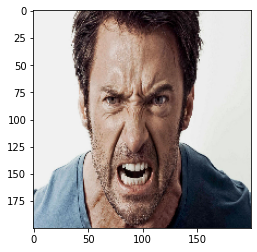

In [37]:
plt.gray()
plt.imshow(show_img);

In [ ]:
print('Expression Prediction:',objects[ind])

Expression Prediction: angry


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


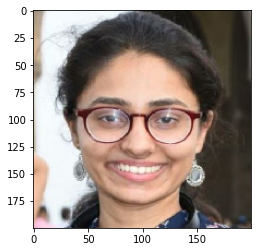

In [38]:
img = image.load_img('/content/drive/My Drive/my_example.JPG', grayscale=True, target_size=(48, 48));

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x/=255
custom = face_model7.predict(x)
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
show_img=image.load_img('/content/drive/My Drive/my_example.JPG', grayscale=False, target_size=(200, 200))
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
plt.gray()
plt.imshow(show_img);

In [39]:
print('Expression Prediction:',objects[ind])

Expression Prediction: happy


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


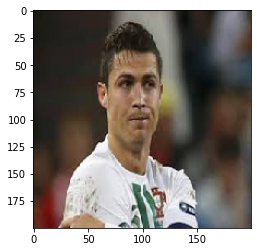

In [40]:
img = image.load_img('/content/drive/My Drive/ronaldo.jpg', grayscale=True, target_size=(48, 48));

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x/=255
custom = face_model7.predict(x)
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
show_img=image.load_img('/content/drive/My Drive/ronaldo.jpg', grayscale=False, target_size=(200, 200))
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
plt.gray()
plt.imshow(show_img);

In [41]:
print('Expression Prediction:',objects[ind])

Expression Prediction: sad


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


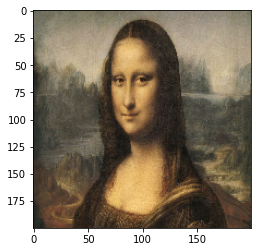

In [42]:
img = image.load_img('/content/drive/My Drive/monalisa.jpg', grayscale=True, target_size=(48, 48));

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x/=255
custom = face_model7.predict(x)
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
show_img=image.load_img('/content/drive/My Drive/monalisa.jpg', grayscale=False, target_size=(200, 200))
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
plt.gray()
plt.imshow(show_img);

In [43]:
print('Expression Prediction:',objects[ind])

Expression Prediction: sad


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


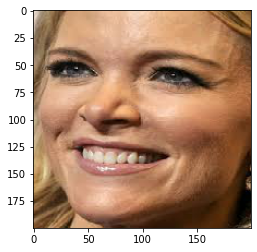

In [44]:
img = image.load_img('/content/drive/My Drive/example2.jpg', grayscale=True, target_size=(48, 48));

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x/=255
custom = face_model7.predict(x)
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
show_img=image.load_img('/content/drive/My Drive/example2.jpg', grayscale=False, target_size=(200, 200))
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
plt.gray()
plt.imshow(show_img);

In [45]:
print('Expression Prediction:',objects[ind])

Expression Prediction: happy


## Normalized Confusion Matrix of test data

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
y_test=(np.arange(7)==y_test[:,None]).astype(np.float32)
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(face_model7.predict(X_test), axis=1)


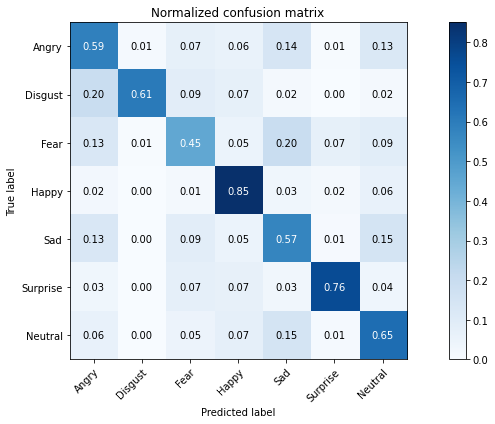

In [47]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(test_true, test_pred, classes=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
                      normalize=True, title='Normalized confusion matrix')
plt.show()

In [48]:
print(classification_report(test_true,test_pred,target_names=objects))

              precision    recall  f1-score   support

       angry       0.56      0.59      0.57       484
     disgust       0.74      0.61      0.67        56
        fear       0.58      0.45      0.51       502
       happy       0.83      0.85      0.84       920
         sad       0.53      0.57      0.55       599
    surprise       0.83      0.76      0.79       442
     neutral       0.58      0.65      0.61       586

    accuracy                           0.66      3589
   macro avg       0.66      0.64      0.65      3589
weighted avg       0.67      0.66      0.66      3589



## Conclusion


We finally conclude that Model with specification


Conv2D0 -> Conv2D1 -> Conv2D2 -> Batchnormalization0 -> Maxpool0 -> Dropout -> Cov2D3 -> Conv2D4 -> batchnormalization -> Maxpool1 -> Dropout -> Conv2D5 -> Conv2d6 -> Batchnormalization -> Maxpool2 -> Dropout -> FC0 -> Dropout -> FC1 ->Softmax with *Adam* optimizer, 100 *epoches* and 64 *batch-size* 
is giving 66.39% accuracy on our test data.So far with this dataset people working all over the world have been able to achieve 71.16% accuracy on test data.As a beginner we are close to it and further we can improve our accuracy with more regularizations.  


